<a href="https://colab.research.google.com/github/MohamadMahdiDarvishi/Tensorflow/blob/main/Notebooks/Tensorflow_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundumentals in TensorFlow

* `NPL` usually is referred to as driving data from their naturall language (could  be text or speech)

* in other hand `NLP` is used for sequence to sequence problems

## Prerequirities

In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import random
from tensorflow.keras.utils import plot_model

In [ ]:
# get helper functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import compare_historys , plot_loss_curves , unzip_data , create_tensorboard_callback

--2023-09-11 12:15:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-11 12:15:56 (56.1 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# testing GPU
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


## Get data

In [ ]:
# Download data
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
# unzip data
unzip_data("nlp_getting_started.zip")

--2023-09-11 12:15:56--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.207, 173.194.217.207, 173.194.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip.1’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.01s   

2023-09-11 12:15:56 (56.7 MB/s) - ‘nlp_getting_started.zip.1’ saved [607343/607343]



### A glance at data set

* read data using `pd.read_csv()` -> `train_df` , `test_df`
* readig top five records using `train_df.head()`
* shuffling record using `train_df.sample(frac=1 , random_state=42)`
* counting targets by the classes by `train_df.target.value_counts()`
* looking at number of train and test samples `len(train_df)` , `len(test_df)`
* finally sampling 5 records with their details

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
# head method in pandas returns the first 5 records of data
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


❗ **Note**

test data doesn't have target lables

In [ ]:
# looking test data
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# shuffling train_data
train_df_shuffled = train_df.sample(frac = 1 , random_state = 42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# how many examples of each class
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# how samples in train and test datasets
print(f"train_samples : {len(train_df)}")
print(f"test_samples : {len(test_df)}")

train_samples : 7613
test_samples : 3263


In [ ]:
# taking some random samples
random_index = random.sample(k = 5 , population = sorted(train_df["id"]))
for i in random_index :
  id = list(train_df[train_df["id"] == i]["id"])[0]
  target = list(train_df[train_df["id"] == i]["target"])[0]
  text = list(train_df[train_df["id"] == i]["text"])[0]
  print(f"Sample id : {id}")
  print(f"Sample target is {target} " , "(real diaster)" if target > 0 else "(not real diaster)" )
  print(f"sample text is : {text}")
  print(f"----------\n")

Sample id : 10045
Sample target is 0  (not real diaster)
sample text is : TWISTER DANCE Game  Dance Console Instructions Cable 5 Pre Loaded Songs http://t.co/BcsXyEc4ji http://t.co/DfXI76kvX0
----------

Sample id : 9971
Sample target is 0  (not real diaster)
sample text is : #BBShelli seems pretty sure she's the one that's going to stay! #BB17
----------

Sample id : 1318
Sample target is 0  (not real diaster)
sample text is : Meet the bloody RS5 http://t.co/RVczMimfVx
----------

Sample id : 7862
Sample target is 1  (real diaster)
sample text is : #hot  Reddit's new content policy goes into effect many horrible subreddits banned or quarantined http://t.co/nGKrZPza45 #prebreak #best
----------

Sample id : 8515
Sample target is 0  (not real diaster)
sample text is : @stvmlly Sorry for screaming at you and @Safferoonicle from the car I just kinda 'I KNOW THOSE PEOPLE LET'S YELL!' :/
----------



### spliting train data to training and validation datasets

In [ ]:
from sklearn.model_selection import train_test_split

train_sentences , val_sentences , train_lables , val_lables = train_test_split(train_df_shuffled["text"].to_numpy() ,
                                                                                train_df_shuffled["target"].to_numpy(),
                                                                                test_size = 0.1 , # assigning 10% of data for validation dataset
                                                                                random_state = 42)

In [ ]:
print(f"number training sentences : {len(train_sentences)}")
print(f"number of validation senteces : {len(val_sentences)}")

number training sentences : 6851
number of validation senteces : 762


In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

### Converting text into numbers

* Tokeniziation
* Embedding

#### Text Vectorization (Tokenziziation)

In [ ]:
# importing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# making a instance with deuafalt text vectorization parameters
text_vectorizer = TextVectorization(max_tokens = 1000 , # number of words in vocabulary
                                    ngrams = None , # number of group n words
                                    output_sequence_length = None , # how long the output sequence to be
                                    split = "whitespace" ,
                                    standardize = "lower_and_strip_punctuation" ,
                                    output_mode = "int" ,
                                    pad_to_max_tokens= True)

In [ ]:
# finding the average words in sentences
round(sum(list(len(text.split()) for text in train_sentences))/len(train_sentences))

15

In [ ]:
# setuping text vectorization variables
text_vectorizer = TextVectorization(max_tokens = 1000 , # maximum words to check
                                    output_mode = "int" , # output mode of tokeniztion
                                    output_sequence_length = 15) # maximum lenght of sentences

In [ ]:
# Fitting text vectorizer to a training data set using adapt method
text_vectorizer.adapt(train_sentences)

In [ ]:
vocabulary = text_vectorizer.get_vocabulary()
# top 5 most used sentenceses in vocabulary
print(f"top most 5 words used in train sentenceses : {vocabulary[:5]}")
print(f"top least 5 words used in train sentenceses : {vocabulary[-5:]}")

top most 5 words used in train sentenceses : ['', '[UNK]', 'the', 'a', 'in']
top least 5 words used in train sentenceses : ['reported', 'r', 'pray', 'playlist', 'patience']


In [ ]:
len(vocabulary)

1000

In [ ]:
# vectorizing a sample sentences from
sample_sentence = "I have a tea"
text_vectorizer(sample_sentence).numpy()

array([ 8, 24,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [ ]:
# vectorizing a random sentence from train_sentences
random_sentences = random.sample(k=1 , population = list(train_sentences))
text_vectorized = text_vectorizer(random_sentences)
print(f"original sentence : {random_sentences[0]}")
print(f"vectorized sentence : {text_vectorized[0]}")

original sentence : Rainstorm Destroys 600 Houses In Yobe | iReporter https://t.co/0rNY349UnT via @sharethis
vectorized sentence : [569   1   1 889   4   1   1   1  49   1   0   0   0   0   0]


#### Creating an Embedding using a embedding layer

In [ ]:
embedding = tf.keras.layers.Embedding(output_dim = 128 ,
                                      embeddings_initializer = "uniform" , # firstly initialize tensors with random values
                                      input_dim = 1000 ,
                                      input_length = 15)

In [ ]:
# embedding a random sentence from train_sentences
random_sentences_vectorized = text_vectorizer(random.sample(k=1 , population = list(train_sentences)))
text_embedded = embedding(random_sentences_vectorized)
print(f"original sentence : \n {random_sentences[0]}\n")
print(f"embedded sentence : \n {text_embedded[0]}\n")
print(f"embedded sentence shape : {text_embedded.shape}")

original sentence : 
 Rainstorm Destroys 600 Houses In Yobe | iReporter https://t.co/0rNY349UnT via @sharethis

embedded sentence : 
 [[ 0.03086212  0.03146299 -0.0111385  ... -0.01688785  0.03517629
  -0.00922697]
 [ 0.00281017 -0.03257195  0.02538886 ...  0.02245313 -0.02829835
   0.00244151]
 [ 0.01345586 -0.00078679 -0.00284276 ...  0.02456346 -0.04108254
  -0.02238947]
 ...
 [-0.03370773 -0.04548356 -0.02206467 ... -0.0241585   0.00787045
  -0.01708555]
 [ 0.04301823 -0.03930904  0.0164105  ...  0.03296581  0.0099923
  -0.01548431]
 [ 0.00281017 -0.03257195  0.02538886 ...  0.02245313 -0.02829835
   0.00244151]]

embedded sentence shape : (1, 15, 128)


## Build Model

models for working on text datasets :

* `model_0` - Naive Bayes (baseline model) getting from scikit-learn
* `model_1` - Feed-Forward (Dense layer model)
* `model_2` - LSTM model
* `model_3` - GRU model
* `model_4` - bidirectional LSTM
* `model_5` - 1D Convoloutional Neural Network
* `model_6` - Tensorflow hub pretrained word embedding (Feature Extraction)
* `model_7` - same as last model but with 10%  of data

⚡ steps for each model :

1. construct model
2. train model
3. making predictions
4. tracking evaluatiom metrics

### **model_0**

 baseline model  

In [ ]:
# Imports
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

model_0 = Pipeline([
    ("Tfidf" , TfidfVectorizer()) , # converting texts to numbers for finding patterns
    ("clf" , MultinomialNB()) # deep learning engine of model (looking for patterns)
])

model_0.fit(train_sentences , train_lables)

Pipeline(steps=[('Tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences , val_lables)
print(f"Our baseline model achived the accuarcy of : {baseline_score*100:.2f}%")

Our baseline model achived the accuarcy of : 79.27%


In [ ]:
# making prediction on validation_data
model_0.predict(val_sentences)[20:25] , train_lables[20:25]

(array([1, 0, 0, 0, 1]), array([0, 0, 0, 0, 0]))

Creating a function for calculating models accuracy :

* Accuracy
* Precision
* Recall
* fscore (F-1 Score)

In [ ]:
from sklearn.metrics import accuracy_score , precision_recall_fscore_support

def acc_func(y_true , y_pred) :
  model_accuracy = accuracy_score(y_true , y_pred) * 100
  model_precision , model_recall , fscore_acc , _ = precision_recall_fscore_support(y_true , y_pred)
  results = {
      "accuracy" : model_accuracy ,
      "precision" : (sum(list(i for i in model_precision))/2) ,
      "recall" : sum(list(i for i in model_recall))/2 ,
      "fscore" : sum(list(i for i in fscore_acc))/2
  }

  return results

In [ ]:
# testing our function for calculating accuracy
baseline_preds = model_0.predict(val_sentences)
baseline_result = acc_func(y_true = val_lables ,
                           y_pred = baseline_preds)
baseline_result

{'accuracy': 79.26509186351706,
 'precision': 0.817120438646247,
 'recall': 0.7794019656838247,
 'fscore': 0.7820571304442272}

In [ ]:
model_0_results = baseline_result

### **model_1**

feed-forward model

In [ ]:
# Create model
inputs = tf.keras.Input(shape = (1,) , dtype = tf.string , name = "input_layer")
x = embedding(text_vectorizer(inputs))
x = tf.keras.layers.GlobalAveragePooling1D(name = "global_average_pooling_1d")(x)
outputs = tf.keras.layers.Dense(1 , activation = "sigmoid" , name = "output_layer")(x)
model_1 = tf.keras.Model(inputs , outputs , name = "model_1_forward_feed")
# compile model
model_1.compile(loss = tf.keras.losses.binary_crossentropy ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"])
# fit model
model_1.fit(epochs = 5,
            x = train_sentences ,
            y = train_lables ,
            validation_data = (val_sentences , val_lables) ,
            callbacks = [create_tensorboard_callback(dir_name = "text_problem" ,
                                                     experiment_name= "feed_forward")])

Saving TensorBoard log files to: text_problem/feed_forward/20230911-121559
Epoch 1/5
215/215 [==============================] - 5s 15ms/step - loss: 0.6226 - accuracy: 0.6668 - val_loss: 0.5617 - val_accuracy: 0.7349
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4936 - accuracy: 0.7811 - val_loss: 0.5000 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.4387 - accuracy: 0.8051 - val_loss: 0.4889 - val_accuracy: 0.7795
Epoch 4/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4112 - accuracy: 0.8178 - val_loss: 0.4855 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3943 - accuracy: 0.8237 - val_loss: 0.4967 - val_accuracy: 0.7835


In [ ]:
# making prediction
model_1_pred = model_1.predict(val_sentences , verbose = 0)
# turning prediction probilities to prediction lables
model_1_pred = tf.round(model_1_pred)
# a glance
val_lables[-5:] , model_1_pred[-5:]

(array([0, 0, 0, 0, 0]),
 <tf.Tensor: shape=(5, 1), dtype=float32, numpy=
 array([[0.],
        [0.],
        [1.],
        [0.],
        [0.]], dtype=float32)>)

In [ ]:
model_1_results = acc_func(y_pred=model_1_pred ,
                           y_true = val_lables)
model_1_results

{'accuracy': 78.34645669291339,
 'precision': 0.7948830310793501,
 'recall': 0.7732383808095952,
 'fscore': 0.7757876322082591}

**Looking through embedding layer** - Actully in embedding layer we are looking for diffrent limensions of words for helping our  model to learn the relationship between words

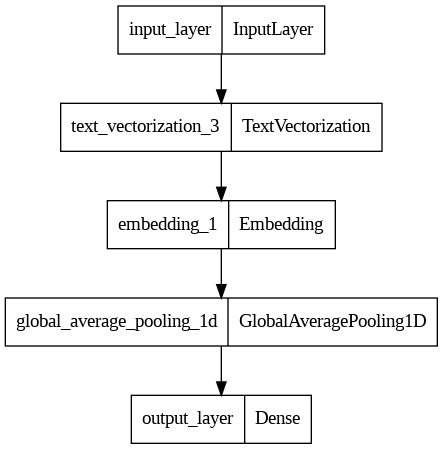

In [ ]:
plot_model(model_1)

In [ ]:
embedding_weights = model_1.layers[2].weights[0]
embedding_weights.shape # 1000 = words in vocabulary , 128 = output dimension of embedding

TensorShape([1000, 128])

👽 **code to save trained embedding to file**

In [ ]:
# 1 . getting words in vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
# 2 . importing io library
import io
# 3 .openning files
out_v = io.open('vectors.tsv' , 'w' , encoding = 'utf-8')
out_m = io.open('metadata.tsv' , 'w' , encoding = 'utf-8')
# 4 . writitng data into files
for index , word in enumerate(words_in_vocab) :
  if index == 0 :
    continue
  vec = embedding_weights[index]
  out_v.write('\t'.join([str(i) for i in vec]) + '\n')
  out_m.write(word + '\n')

out_v.close()
out_m.close

<function TextIOWrapper.close()>

In [ ]:
# Download saved embedding
from google.colab import files
try:
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception :
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **model_2**

LSTM (Long Short-Term Memory) Kind of RNN models

In [ ]:
# Create model
inputs = tf.keras.Input(shape = (1,) , dtype = tf.string , name = "input_layer ")
x = embedding(text_vectorizer(inputs))
print(f"data shape after embedding : {x.shape}")
x = tf.keras.layers.LSTM(64 , activation = tf.keras.activations.tanh)(x)
print(f"data shape after LSTM layer : {x.shape}")
outputs = tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid , name = "output_layer")(x)
model_2 = tf.keras.Model(inputs , outputs)

# compile model
model_2.compile(loss = tf.keras.losses.binary_crossentropy ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"])

# fit model
model_2.fit(epochs = 5,
            x = train_sentences ,
            y = train_lables,
            validation_data = (val_sentences , val_lables) ,
            callbacks = [create_tensorboard_callback(dir_name = "text_problem" ,
                                                     experiment_name = "LSTM model")])

data shape after embedding : (None, 15, 128)
data shape after LSTM layer : (None, 64)
Saving TensorBoard log files to: text_problem/LSTM model/20230911-121758
Epoch 1/5
215/215 [==============================] - 8s 23ms/step - loss: 0.4047 - accuracy: 0.8212 - val_loss: 0.4890 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.3803 - accuracy: 0.8342 - val_loss: 0.5260 - val_accuracy: 0.7743
Epoch 3/5
215/215 [==============================] - 7s 32ms/step - loss: 0.3707 - accuracy: 0.8380 - val_loss: 0.5033 - val_accuracy: 0.7651
Epoch 4/5
215/215 [==============================] - 9s 41ms/step - loss: 0.3601 - accuracy: 0.8440 - val_loss: 0.4995 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 6s 30ms/step - loss: 0.3399 - accuracy: 0.8533 - val_loss: 0.5267 - val_accuracy: 0.7703


In [ ]:
# make_prediction
model_2_pred = model_2.predict(val_sentences , verbose = 0)
# turning prediction probilities to prediction lables
model_2_pred = tf.round(model_2_pred)
# A glance
model_2_pred[-5:] , val_lables[-5:]

(<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
 array([[0.],
        [0.],
        [1.],
        [0.],
        [0.]], dtype=float32)>,
 array([0, 0, 0, 0, 0]))

In [ ]:
# getting accuracy metrics
model_2_results = acc_func(y_true = val_lables ,
                           y_pred = model_2_pred)
model_2_results

{'accuracy': 77.03412073490814,
 'precision': 0.770455783805204,
 'recall': 0.7652840246543395,
 'fscore': 0.766715242145555}

❗ **Note**

returned values for fscore , recall and precision are in shape of [2] which representing correct prediction percentage for `val_sentences` with target of 0 , 1 in order

### **model_3**

 GRU (Gated Recurrent Unit) Building an RNN using GRU

In [ ]:
# Create model
inputs = tf.keras.Input(shape = (1,) , dtype = tf.string , name = "input_layer")
x = embedding(text_vectorizer(inputs))
x = tf.keras.layers.GRU(64 , activation = tf.keras.activations.tanh)(x)
outputs = tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid , name = "output_layer")(x)
model_3 = tf.keras.Model(inputs , outputs)

# compile model
model_3.compile(loss = tf.keras.losses.binary_crossentropy ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"])
# fit model
model_3.fit(epochs = 5,
            x = train_sentences ,
            y = train_lables ,
            validation_data = (val_sentences , val_lables) ,
            callbacks = [create_tensorboard_callback(dir_name = "text_problem" ,
                                                     experiment_name = "GRU model")])

Saving TensorBoard log files to: text_problem/GRU model/20230911-121836
Epoch 1/5
215/215 [==============================] - 8s 19ms/step - loss: 0.3896 - accuracy: 0.8269 - val_loss: 0.5203 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 7s 33ms/step - loss: 0.3358 - accuracy: 0.8602 - val_loss: 0.5369 - val_accuracy: 0.7559
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3181 - accuracy: 0.8666 - val_loss: 0.5284 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 4s 20ms/step - loss: 0.2992 - accuracy: 0.8768 - val_loss: 0.5456 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 6s 26ms/step - loss: 0.2833 - accuracy: 0.8850 - val_loss: 0.5501 - val_accuracy: 0.7651


In [ ]:
# making predictions
model_3_pred = model_3.predict(val_sentences , verbose = 0)
# turning prediction probilities to prediction lables
model_3_pred = tf.squeeze(tf.round(model_3_pred))
# A glance
model_3_pred[-5:].numpy() , val_lables[-5:]

(array([0., 0., 1., 0., 0.], dtype=float32), array([0, 0, 0, 0, 0]))

In [ ]:
model_3_results = acc_func(y_true = val_lables ,
                           y_pred = model_3_pred.numpy())
model_3_results

{'accuracy': 76.50918635170603,
 'precision': 0.7704009597869741,
 'recall': 0.756559220389805,
 'fscore': 0.758595728639214}

### **model_4**

 Bidirectional RNN model

❗ **Note**

we don't have `tanh` activation for our core layer

In [ ]:
# create model
inputs = tf.keras.Input(shape = (1,) , dtype = tf.string , name = "input_layer")
x = embedding(text_vectorizer(inputs))
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))(x)
outputs = tf.keras.layers.Dense(1 , activation = "sigmoid" , name = "output_layer")(x)
model_4 = tf.keras.Model(inputs , outputs)
# compile model
model_4.compile(loss = tf.keras.losses.binary_crossentropy ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"])
# fit model
model_4.fit(epochs = 5 ,
            x = train_sentences ,
            y = train_lables ,
            validation_data = (val_sentences , val_lables) ,
            callbacks = [create_tensorboard_callback(dir_name = "text_problem" ,
                                                     experiment_name = "Bidirectional model")])

Saving TensorBoard log files to: text_problem/Bidirectional model/20230911-121906
Epoch 1/5
215/215 [==============================] - 15s 33ms/step - loss: 0.3575 - accuracy: 0.8516 - val_loss: 0.5613 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 7s 32ms/step - loss: 0.2912 - accuracy: 0.8825 - val_loss: 0.5873 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 6s 26ms/step - loss: 0.2749 - accuracy: 0.8894 - val_loss: 0.6139 - val_accuracy: 0.7493
Epoch 4/5
215/215 [==============================] - 11s 49ms/step - loss: 0.2519 - accuracy: 0.8999 - val_loss: 0.6337 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 13s 59ms/step - loss: 0.2357 - accuracy: 0.9045 - val_loss: 0.7074 - val_accuracy: 0.7480


In [ ]:
# make prediction
model_4_pred = model_4.predict(val_sentences , verbose = 0)
# turning prediction lables to prediction lables
model_4_pred = tf.squeeze(tf.round(model_4_pred))
# A glance
model_4_pred [-5:].numpy() , val_lables[-5:]

(array([1., 1., 1., 0., 0.], dtype=float32), array([0, 0, 0, 0, 0]))

In [ ]:
model_4_results = acc_func(y_true = val_lables ,
                           y_pred = model_4_pred)
model_4_results

{'accuracy': 74.80314960629921,
 'precision': 0.7483333333333333,
 'recall': 0.7420039980009996,
 'fscore': 0.7434343434343434}

### **model_5**

 Conv1D layer

In [ ]:
from keras.src import callbacks
# create model
inputs = tf.keras.Input(shape = (1,) , dtype = tf.string , name = "input_layer")
x = embedding(text_vectorizer(inputs))
x = tf.keras.layers.Conv1D(filters = 32 , kernel_size = 5 , activation = "relu")(x)
x = tf.keras.layers.GlobalMaxPool1D(name = "global_max_pool_1d")(x)
outputs = tf.keras.layers.Dense(1 , activation = "sigmoid" , name = "output_layer")(x)
model_5 = tf.keras.Model(inputs , outputs)
# compile model
model_5.compile(loss = tf.keras.losses.binary_crossentropy ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"])
# fit model
model_5.fit(epochs = 5,
            x = train_sentences ,
            y = train_lables ,
            batch_size = 32 ,
            validation_data = (val_sentences , val_lables) ,
            callbacks = [create_tensorboard_callback(dir_name = "text_problem" ,
                                                     experiment_name = "Conv 1D")])

Saving TensorBoard log files to: text_problem/Conv 1D/20230911-122037
Epoch 1/5
215/215 [==============================] - 5s 17ms/step - loss: 0.3748 - accuracy: 0.8374 - val_loss: 0.5544 - val_accuracy: 0.7651
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3374 - accuracy: 0.8583 - val_loss: 0.5699 - val_accuracy: 0.7572
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.3112 - accuracy: 0.8726 - val_loss: 0.5953 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 3s 13ms/step - loss: 0.2883 - accuracy: 0.8835 - val_loss: 0.6011 - val_accuracy: 0.7651
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2580 - accuracy: 0.8997 - val_loss: 0.6146 - val_accuracy: 0.7585


In [ ]:
# make prediction
model_5_pred = model_5.predict(val_sentences , verbose = 0)
# turning prediction probilities to prediction lables
model_5_pred = tf.squeeze(tf.round(model_5_pred))
# A glance
model_5_pred[-5:].numpy() , val_lables[-5:]

(array([0., 0., 1., 0., 0.], dtype=float32), array([0, 0, 0, 0, 0]))

In [ ]:
model_5_results = acc_func(y_true = val_lables ,
                           y_pred = model_5_pred)
model_5_results

{'accuracy': 75.8530183727034,
 'precision': 0.7597688654957377,
 'recall': 0.7521239380309845,
 'fscore': 0.7537653141508374}

### **model_6**  

 Tensorflow Hun Pretrained Universal Sentence Encoder (USE)

In [ ]:
# Imports
import tensorflow_hub as hub
# preparing encoder layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4" ,
                                        input_shape = [] ,
                                        dtype = tf.string ,
                                        trainable = False ,
                                        name = "USE")
# create model
model_6 = tf.keras.Sequential([
    sentence_encoder_layer ,
    tf.keras.layers.Dense(64 , activation = "relu") ,
    tf.keras.layers.Dense(1 , activation = "sigmoid" , name = "output_layer")
] , name = "model_6")

# compile model
model_6.compile(loss = tf.keras.losses.binary_crossentropy ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"])

# fit model
model_6.fit(epochs = 5 ,
            x = train_sentences ,
            y = train_lables ,
            validation_data = (val_sentences , val_lables) ,
            callbacks = [create_tensorboard_callback(dir_name = "text_problem" ,
                                                     experiment_name = "tenserflow_hub pretrained model")])

Saving TensorBoard log files to: text_problem/tenserflow_hub pretrained model/20230911-125737
Epoch 1/5
215/215 [==============================] - 14s 41ms/step - loss: 0.5000 - accuracy: 0.7825 - val_loss: 0.4500 - val_accuracy: 0.8005
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.4147 - accuracy: 0.8139 - val_loss: 0.4409 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 14ms/step - loss: 0.4017 - accuracy: 0.8215 - val_loss: 0.4358 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.3927 - accuracy: 0.8278 - val_loss: 0.4347 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3866 - accuracy: 0.8283 - val_loss: 0.4357 - val_accuracy: 0.8150


In [ ]:
# make prediction
model_6_pred = model_6.predict(val_sentences , verbose = 0)
# turning prediction probilities to prediction lables
model_6_pred = tf.squeeze(tf.round(model_6_pred))
# A glance
model_6_pred[-5:].numpy() , val_lables[-5:]

(array([0., 0., 1., 1., 0.], dtype=float32), array([0, 0, 0, 0, 0]))

In [ ]:
model_6_results = acc_func(y_pred = model_6_pred ,
                           y_true = val_lables)

model_6_results

{'accuracy': 81.10236220472441,
 'precision': 0.8146929824561404,
 'recall': 0.8047851074462768,
 'fscore': 0.8071496361910788}

### **model_7**

TF Hub Pretrained model on 10% of training data

❗ **Note**

in spliting datasets we must be aware of data leakage for example not using the main data like `train_df` for picking 10% of data because we pick the validation data from this data set and cause data leakage from test dataset to train dataset

In [ ]:
# prepare data
split_border = int(len(train_sentences)/10)
train_sentences_10 = train_sentences[:split_border]
train_lables_10 = train_lables[:split_border]

In [ ]:
pd.Series(np.array(train_lables_10)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
# create model
model_7  = tf.keras.models.clone_model(model_6)
model_7.name = "model_7"
compile model
model_7.compile(loss = tf.keras.losses.binary_crossentropy ,
                optimizer = tf.keras.optimizers.Adam() ,
                metrics = ["accuracy"])
# fit model
model_7.fit(epochs = 5 ,
            x = train_sentences_10 ,
            y = train_lables_10 ,
            validation_data = (val_sentences , val_lables) ,
            callbacks = [create_tensorboard_callback(dir_name = "text_problem",
                                                     experiment_name = "TF Hub with 10% data")])

Saving TensorBoard log files to: text_problem/TF Hub with 10% data/20230911-131218
Epoch 1/5
22/22 [==============================] - 4s 48ms/step - loss: 0.6700 - accuracy: 0.6788 - val_loss: 0.6458 - val_accuracy: 0.7454
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5992 - accuracy: 0.7869 - val_loss: 0.5879 - val_accuracy: 0.7612
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5232 - accuracy: 0.8117 - val_loss: 0.5315 - val_accuracy: 0.7743
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4610 - accuracy: 0.8248 - val_loss: 0.5051 - val_accuracy: 0.7730
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4199 - accuracy: 0.8307 - val_loss: 0.4880 - val_accuracy: 0.7782


In [ ]:
model_7.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# make prediction
model_7_pred = model_7.predict(val_sentences , verbose = 0)
# turn prediction probilities to prediction lables
model_7_pred = tf.squeeze(tf.round(model_7_pred))
# A glance
model_7_pred[:5].numpy() , val_lables[:5]

(array([0., 1., 1., 0., 1.], dtype=float32), array([0, 0, 1, 1, 1]))

❗ **Note**

as we pick our data from beginig of `train_sentences` we must index from begining of `val_lables`

In [ ]:
model_7_results = acc_func(y_true = val_lables ,
                           y_pred = model_7_pred)
model_7_results

{'accuracy': 77.82152230971128,
 'precision': 0.7800317194967745,
 'recall': 0.7720722971847409,
 'fscore': 0.7739225692963192}

## Compare Performane of each model

In [ ]:
all_model_results = pd.DataFrame({
    "0_baseline" : model_0_results ,
    "1_forward_feed" : model_1_results ,
    "2_ LSTM" : model_2_results ,
    "3_GRU" : model_3_results ,
    "4_bidirectional" : model_4_results ,
    "5_Conv1D" : model_5_results ,
    "6_TF_HUB_USE" : model_6_results ,
    "7_TF_HUB_USE_10" : model_7_results
})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,fscore
0_baseline,79.265092,0.817120,0.779402,0.782057
1_forward_feed,78.346457,0.794883,0.773238,0.775788
2_ LSTM,77.034121,0.770456,0.765284,0.766715
3_GRU,76.509186,0.770401,0.756559,0.758596
4_bidirectional,74.803150,0.748333,0.742004,0.743434
5_Conv1D,75.853018,0.759769,0.752124,0.753765
6_TF_HUB_USE,81.102362,0.814693,0.804785,0.807150
7_TF_HUB_USE_10,77.821522,0.780032,0.772072,0.773923


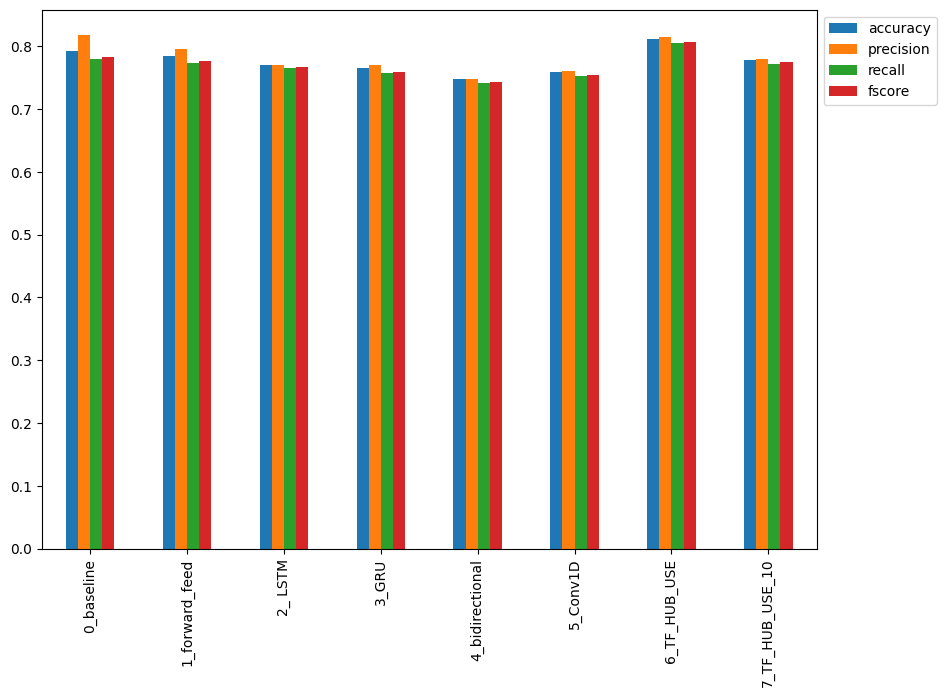

In [ ]:
# turning accuracy metric to same scale as other scales
all_model_results["accuracy"] = all_model_results["accuracy"]/100
# plot and compare all model results
all_model_results.plot(kind = "bar" , figsize = (10,7)).legend(bbox_to_anchor = (1 ,1)) ;

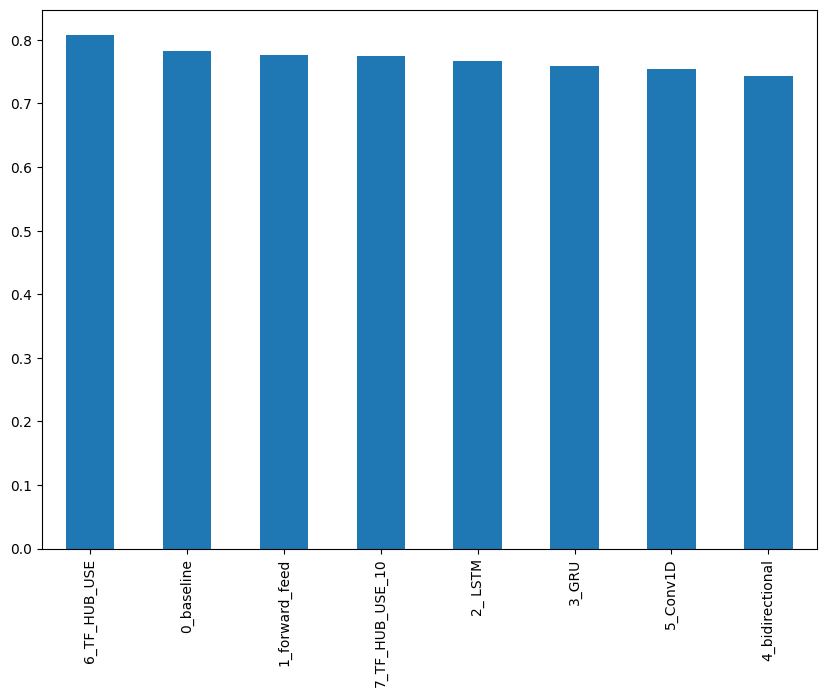

In [ ]:
all_model_results.sort_values("fscore" , ascending = False)["fscore"].plot(kind = "bar" , figsize = (10,7)) ;

## Uploading model results to TensorBoard

In [ ]:
!tensorboard dev upload --logdir ./text_problem/ \
  --name "Text Encoding Problem"\
  --description "Looking through different models "\
  --one_shot

2023-09-11 14:23:05.969644: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./text_problem/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   YTF-QSD-WVW



New experiment created. View your TensorBoard at: https://tensorboard.dev/expe

In [ ]:
!tensorboard dev list

2023-09-11 14:24:47.885287: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/EAEv4ltkQzesmWsXOL9D0w/
	Name                 Text Encoding Problem
	Description          Looking through different models 
	Id                   EAEv4ltkQzesmWsXOL9D0w
	Created              2023-09-11 14:23:49 (1 minute ago)
	Updated              2023-09-11 14:24:05 (45 seconds ago)
	Runs                 31
	Tags                 5
	Scalars              510
	Tensor bytes         0
	Binary object bytes  8057551
https://tensorboard.dev/experiment/lDHegysrRM2FwYkV6GDiKw/
	Name                 transfer learning with fine tunning
	Description          doing fine tunning on 10% and 100% of 10 classes of foof101 classes
	Id                   lDHegysrRM2FwYkV6GDiKw
	Created              2023-09-03 09:36:13
	Updated              2023-09-03 09:36:14
	Runs                 2
	Tags                 5
	Scalars              36
	Tensor bytes     

## Saving and Loading a Trained model

as we know there is two formats to download models :

* `HDF5` format
* `SaveModel` format

### `HDF5` Format

In [ ]:
# save model
model_6.save("model_6.h5")

In [ ]:
# load model with Tensorflow hub layer (required for HDF5 format)
model_6_loaded = tf.keras.models.load_model("model_6.h5" ,
                                            custom_objects = {"KerasLayer" : hub.KerasLayer})

In [ ]:
# evaluate model
model_6_loaded.evaluate(val_sentences , val_lables , verbose = 0)

[0.43574386835098267, 0.8149606585502625]

### `SaveModel` Format

In [ ]:
# save model
model_6.save("model_6_SaveModel_format")

In [ ]:
# Load model
loaded_model_6_SaveModel = tf.keras.models.load_model("model_6_SaveModel_format")

In [ ]:
# evaluate model
loaded_model_6_SaveModel.evaluate(val_sentences , val_lables , verbose = 0)

[0.43574386835098267, 0.8149606585502625]

## Finding Most Wrong Answers

⚡ Tip

Actully for finding the most wrong answers we use the prediction probily amount in the way that as much as it is closer to opposit target label it is more wrong answer

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2023-09-11 15:15:40--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.207, 172.253.123.207, 142.250.97.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  8.49MB/s    in 42s     

2023-09-11 15:16:23 (21.7 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variable

In [ ]:
# load model
pre_trained_model = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
# evaluate model
pre_trained_model.evaluate(val_sentences , val_lables , verbose = 0)

24/24 [==============================] - 1s 12ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
pre_trained_model_pred_prob = pre_trained_model.predict(val_sentences ,verbose =0)
pre_trained_model_pred_label = tf.squeeze(tf.round(pre_trained_model_pred_prob))

24/24 [==============================] - 1s 11ms/step


In [ ]:
val_df = pd.DataFrame({
    "text" : val_sentences ,
    "target" : val_lables ,
    "pred_label" : pre_trained_model_pred_label ,
    "pred_prob" : tf.squeeze(pre_trained_model_pred_prob)
})
val_df.head()

,text,target,pred_label,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# most wrong answers
most_wrong = val_df[val_df['pred_label'] != val_df['pred_prob']].sort_values("pred_prob" , ascending = False).head()
most_wrong

,text,target,pred_label,pred_prob
90,Dramatic Video Shows Plane Landing During Viol...,1,1.0,0.995807
179,beforeitsnews : Hundreds feared dead after Lib...,1,1.0,0.994646
166,BBC News - India rail crash: Trains derail in ...,1,1.0,0.993717
257,USGS reports a M1.94 #earthquake 5km S of Volc...,1,1.0,0.992790
395,The Catastrophic Effects of Hiroshima and Naga...,1,1.0,0.991882


In [ ]:
# most correct answers
most_correct = val_df[val_df['pred_label'] != val_df['pred_prob']].sort_values("pred_prob" , ascending = True).head()
most_correct

,text,target,pred_label,pred_prob
593,Season 3 of New Girl was such a emotional trai...,0,0.0,0.012896
713,I hate that Im so awkward and I ruin things,0,0.0,0.020455
717,Some days I drown in my tears but I don't let ...,0,0.0,0.022529
589,my vibrator shaped vape done busted,0,0.0,0.023994
369,If you fill your mind with encouragement and p...,0,0.0,0.025258


In [ ]:
for row in most_wrong.itertuples() :
  _ , text , target , pred_label , pred_prob = row
  print(f"target : {target}")
  print(f"prediction probility : {pred_prob}")
  print(f"text : {text}\n")
  print("-----------\n")

target : 1
prediction probility : 0.9958066940307617
text : Dramatic Video Shows Plane Landing During Violent Storm http://t.co/XRgPdlSWfD

-----------

target : 1
prediction probility : 0.994646430015564
text : beforeitsnews : Hundreds feared dead after Libyan migrant boat capsizes during rescue Û_ http://t.co/MjoeeBDLXn) http://t.co/fvEn1ex0PS

-----------

target : 1
prediction probility : 0.9937171936035156
text : BBC News - India rail crash: Trains derail in Madhya Pradesh flash flood http://t.co/WgmZmJ5imD

-----------

target : 1
prediction probility : 0.992790162563324
text : USGS reports a M1.94 #earthquake 5km S of Volcano Hawaii on 8/6/15 @ 1:04:01 UTC http://t.co/Njd28pg9Xv #quake

-----------

target : 1
prediction probility : 0.9918819069862366
text : The Catastrophic Effects of Hiroshima and Nagasaki Atomic Bombings Still Being Felt Today http://t.co/TzxeG4gOkD

-----------



In [ ]:
for row in most_correct.itertuples() :
  _ , text , target , pred_label , pred_prob = row
  print(f"target : {target}")
  print(f"prediction probility : {pred_prob}")
  print(f"text : {text}\n")
  print("-----------\n")

target : 0
prediction probility : 0.01289632823318243
text : Season 3 of New Girl was such a emotional train wreck I just wanted to cry laugh and eat a lot of ice cream

-----------

target : 0
prediction probility : 0.020454583689570427
text : I hate that Im so awkward and I ruin things

-----------

target : 0
prediction probility : 0.02252894826233387
text : Some days I drown in my tears but I don't let it get me down

-----------

target : 0
prediction probility : 0.0239937175065279
text : my vibrator shaped vape done busted

-----------

target : 0
prediction probility : 0.02525799348950386
text : If you fill your mind with encouragement and positivity then it won't take you hostage. Be careful of your content

-----------



## Make Prediction on test dataset

In [ ]:
test_sentences  = test_df["text"].to_list()
test_sentences_samples = random.sample(population = test_sentences , k = 5)
for sample_sentence in test_sentences_samples :
  prob = pre_trained_model.predict([sample_sentence] , verbose = 0)
  pred = tf.squeeze(tf.round(prob))
  print(f"Pred: {pred}  ,   prob : {prob}")
  print(f"text : \n {sample_sentence}\n")
  print("------------------\n")

Pred: 0.0  ,   prob : [[0.24661551]]
text : 
 We should do a hand in the destruction of an INNOCENT young man's life.

------------------

Pred: 1.0  ,   prob : [[0.9525297]]
text : 
 HURRICANE GUILLERMO LIVE NOAA TRACKING / LOOPING WED.AUG.5TH ~ http://t.co/QktRt2J1o8 ~  http://t.co/b0JxS5QKkh http://t.co/KP05TOwSfM

------------------

Pred: 0.0  ,   prob : [[0.23229098]]
text : 
 This #NBCTheWiz cast is about to destroy tv sets across the nation!!!!

------------------

Pred: 0.0  ,   prob : [[0.0170117]]
text : 
 Just want someone to smoke a blunt &amp; talk about life with ??

------------------

Pred: 0.0  ,   prob : [[0.19071111]]
text : 
 Almost electrocuted myself ??

------------------



In [ ]:
# TODO :
1.Importing embedding from tensorflow hub
2. Final Project